# Import libraries and mount drive

In [1]:
import numpy as np
#import pandas as pd
import os
import glob
#import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pathlib import Path
import re
import requests
from io import StringIO
import random
import pdb

import matplotlib
matplotlib.use('agg')  # allows notebook to be tested in Travis

import pandas as pd
#import cartopy.crs as ccrs
#import cartopy
import matplotlib.pyplot as plt
#import pandana as pdna
import time

!pip install pandana
import pandana as pdna

!pip install cartopy
import cartopy.crs as ccrs
import cartopy

!pip install urbanaccess
import urbanaccess as ua
from urbanaccess.config import settings
from urbanaccess.gtfsfeeds import feeds
from urbanaccess import gtfsfeeds
from urbanaccess.gtfs.gtfsfeeds_dataframe import gtfsfeeds_dfs
from urbanaccess.network import ua_network, load_network

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load data to an Urban Access transit data object

In [ ]:
#feeds.to_dict()

In [3]:
# I manually add all the feeds from the bus transit companies of Gipuzkoa

feeds.add_feed(add_dict={'Euskotren': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/Euskotren/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_areizaga': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/Renfe/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_arrasate': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/Renfe_Cercanias/google_transit.zip'})

INFO:urbanaccess:Added 1 feeds to gtfs_feeds: {'Euskotren': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/Euskotren/google_transit.zip'}
INFO:urbanaccess:Added 1 feeds to gtfs_feeds: {'lurraldebus_areizaga': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/Renfe/google_transit.zip'}
INFO:urbanaccess:Added 1 feeds to gtfs_feeds: {'lurraldebus_arrasate': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/Renfe_Cercanias/google_transit.zip'}


Added 1 feeds to gtfs_feeds: {'Euskotren': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/Euskotren/google_transit.zip'}
Added 1 feeds to gtfs_feeds: {'lurraldebus_areizaga': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/Renfe/google_transit.zip'}
Added 1 feeds to gtfs_feeds: {'lurraldebus_arrasate': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/Renfe_Cercanias/google_transit.zip'}


In [4]:
# I download all these feeds, 40sg
gtfsfeeds.download()

INFO:urbanaccess:data/gtfsfeed_zips does not exist. Directory was created
INFO:urbanaccess:3 GTFS feed(s) will be downloaded here: data/gtfsfeed_zips


data/gtfsfeed_zips does not exist. Directory was created
3 GTFS feed(s) will be downloaded here: data/gtfsfeed_zips


INFO:urbanaccess:Euskotren GTFS feed downloaded successfully. Took 5.32 seconds for 1,574,543.0KB


Euskotren GTFS feed downloaded successfully. Took 5.32 seconds for 1,574,543.0KB


INFO:urbanaccess:lurraldebus_areizaga GTFS feed downloaded successfully. Took 4.14 seconds for 630,549.0KB


lurraldebus_areizaga GTFS feed downloaded successfully. Took 4.14 seconds for 630,549.0KB


INFO:urbanaccess:lurraldebus_arrasate GTFS feed downloaded successfully. Took 26.00 seconds for 13,938,768.0KB
INFO:urbanaccess:GTFS feed download completed. Took 35.47 seconds
INFO:urbanaccess:data/gtfsfeed_text does not exist. Directory was created


lurraldebus_arrasate GTFS feed downloaded successfully. Took 26.00 seconds for 13,938,768.0KB
GTFS feed download completed. Took 35.47 seconds
data/gtfsfeed_text does not exist. Directory was created


INFO:urbanaccess:lurraldebus_arrasate.zip successfully extracted to: data/gtfsfeed_text/lurraldebus_arrasate
INFO:urbanaccess:lurraldebus_areizaga.zip successfully extracted to: data/gtfsfeed_text/lurraldebus_areizaga
INFO:urbanaccess:Euskotren.zip successfully extracted to: data/gtfsfeed_text/Euskotren


lurraldebus_arrasate.zip successfully extracted to: data/gtfsfeed_text/lurraldebus_arrasate
lurraldebus_areizaga.zip successfully extracted to: data/gtfsfeed_text/lurraldebus_areizaga
Euskotren.zip successfully extracted to: data/gtfsfeed_text/Euskotren


INFO:urbanaccess:GTFS feed zipfile extraction completed. Took 1.58 seconds for 3 files


GTFS feed zipfile extraction completed. Took 1.58 seconds for 3 files


Let's specify a bounding box of coordinates for Gipuzkoa to subset the GTFS data to. You can generate a bounding box by going to http://boundingbox.klokantech.com/ and selecting the CSV format.

In [7]:
# Load GTFS data into an UrbanAcess transit data object
trips = pd.read_csv('/content/drive/MyDrive/Mode-choice/CS_NTT_Gipuzkoa/notebooks/data/Gipuzkoa_no_NaNs.csv')
validation = True
verbose = True
# bbox for Gipuzkoa
bbox = (trips.Origen_long.min(),trips.Origen_lat.min(),trips.Origen_long.max(),trips.Origen_lat.max(),)
remove_stops_outsidebbox = True
append_definitions = True

loaded_feeds = ua.gtfs.load.gtfsfeed_to_df(gtfsfeed_path=None,
                                           validation=validation,
                                           verbose=verbose,
                                           bbox=bbox,
                                           remove_stops_outsidebbox=remove_stops_outsidebbox,
                                           append_definitions=append_definitions)

INFO:urbanaccess:Checking GTFS text file header whitespace... Reading files using encoding: utf-8 set in configuration.
INFO:urbanaccess:Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_arrasate/calendar.txt...


Checking GTFS text file header whitespace... Reading files using encoding: utf-8 set in configuration.
Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_arrasate/calendar.txt...


INFO:urbanaccess:Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_arrasate/stop_times.txt...


Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_arrasate/stop_times.txt...


INFO:urbanaccess:Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_arrasate/stops.txt...
INFO:urbanaccess:Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_arrasate/agency.txt...
INFO:urbanaccess:Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_arrasate/routes.txt...
INFO:urbanaccess:Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_arrasate/trips.txt...
INFO:urbanaccess:Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/calendar.txt...
INFO:urbanaccess:Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/stop_times.txt...


Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_arrasate/stops.txt...
Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_arrasate/agency.txt...
Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_arrasate/routes.txt...
Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_arrasate/trips.txt...
Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/calendar.txt...
Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/stop_times.txt...


INFO:urbanaccess:Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/stops.txt...
INFO:urbanaccess:Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/agency.txt...
INFO:urbanaccess:Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/calendar_dates.txt...
INFO:urbanaccess:Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/routes.txt...
INFO:urbanaccess:Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/trips.txt...
INFO:urbanaccess:GTFS text file header whitespace check completed. Took 1.74 seconds
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_arrasate


Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/stops.txt...
Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/agency.txt...
Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/calendar_dates.txt...
Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/routes.txt...
Removing whitespace from header(s) in: data/gtfsfeed_text/lurraldebus_areizaga/trips.txt...
GTFS text file header whitespace check completed. Took 1.74 seconds
--------------------------------
Processing GTFS feed: lurraldebus_arrasate


INFO:urbanaccess:The unique agency id: renfe_cercanias was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.13 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.01 seconds
INFO:urbanaccess:Records:
INFO:urbanaccess:    stop_id                                  stop_name   stop_lat  stop_lon  \
0     04040         Estación de tren Zaragoza-Delicias  41.658649 -0.911615   
1     05102                  Estación de tren San Xoan  43.494664 -8.213713   
2     05103                Estación de tren Santa Icía  43.500113 -8.199581   
3     05104              Estación de tren Virxe Do Mar  43.496509 -8.204876   
4     05105                  Estación de tren PiÑeiros  43.509526 -8.183968   
..      ...                                        ...        ...       ...   
946   97200  Estación de tren Mirasierra-Paco De Lucía  40.499662 -3.709016   
947   97201      Estación de tren Madrid-Ramón Y Cajal  

The unique agency id: renfe_cercanias was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.13 seconds
Unique GTFS feed id operation complete. Took 0.01 seconds
Records:
    stop_id                                  stop_name   stop_lat  stop_lon  \
0     04040         Estación de tren Zaragoza-Delicias  41.658649 -0.911615   
1     05102                  Estación de tren San Xoan  43.494664 -8.213713   
2     05103                Estación de tren Santa Icía  43.500113 -8.199581   
3     05104              Estación de tren Virxe Do Mar  43.496509 -8.204876   
4     05105                  Estación de tren PiÑeiros  43.509526 -8.183968   
..      ...                                        ...        ...       ...   
946   97200  Estación de tren Mirasierra-Paco De Lucía  40.499662 -3.709016   
947   97201      Estación de tren Madrid-Ramón Y Cajal  40.488298 -3.694683   
948   98003            Estación de tren Fte De La Mora  40.484

INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_areizaga


Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_areizaga


INFO:urbanaccess:The unique agency id: renfe_operadora was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:Records:
INFO:urbanaccess:    stop_id  stop_code                              stop_name  stop_desc  \
0     71801        NaN       Estación de tren Barcelona-Sants        NaN   
1     61307        NaN             Estación de tren Cartagena        NaN   
2     61304        NaN         Estación de tren Torre-Pacheco        NaN   
3     61303        NaN    Estación de tren Balsicas-Mar Menor        NaN   
4     61200        NaN                Estación de tren Murcia        NaN   
..      ...        ...                                    ...        ...   
799   34007        NaN               Estación de tren Crespos        NaN   
800   34005        NaN  Estación de tren San Pedro del Arroyo        NaN   
801 

The unique agency id: renfe_operadora was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
Records:
    stop_id  stop_code                              stop_name  stop_desc  \
0     71801        NaN       Estación de tren Barcelona-Sants        NaN   
1     61307        NaN             Estación de tren Cartagena        NaN   
2     61304        NaN         Estación de tren Torre-Pacheco        NaN   
3     61303        NaN    Estación de tren Balsicas-Mar Menor        NaN   
4     61200        NaN                Estación de tren Murcia        NaN   
..      ...        ...                                    ...        ...   
799   34007        NaN               Estación de tren Crespos        NaN   
800   34005        NaN  Estación de tren San Pedro del Arroyo        NaN   
801   34002        NaN   Estación de tren Cardenyosa de Avila        NaN   
802   72400  

INFO:urbanaccess:agency.txt agency_name column has more than one agency name listed. Unique agency id was assigned using the agency id and associated agency name.
INFO:urbanaccess:Unique agency id operation complete. Took 0.75 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:Records:
INFO:urbanaccess:                                   stop_id  stop_code   stop_name  \
0             ES:Euskotren:StopPlace:1468:        NaN      Atxuri   
1    ES:Euskotren:StopPlaceEntrance:14680:        NaN      Atxuri   
2                 ES:Euskotren:Quay:14681:        NaN      Atxuri   
3             ES:Euskotren:StopPlace:1469:        NaN  Uribitarte   
4    ES:Euskotren:StopPlaceEntrance:14690:        NaN  Uribitarte   
..                                     ...        ...         ...   
484               ES:Euskotren:Quay:26782:        NaN      Iliada   
485           ES:Euskotren:StopPlace:2679:        NaN     Nikosia   
486  ES:Euskotren:StopPlac

agency.txt agency_name column has more than one agency name listed. Unique agency id was assigned using the agency id and associated agency name.
Unique agency id operation complete. Took 0.75 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
Records:
                                   stop_id  stop_code   stop_name  \
0             ES:Euskotren:StopPlace:1468:        NaN      Atxuri   
1    ES:Euskotren:StopPlaceEntrance:14680:        NaN      Atxuri   
2                 ES:Euskotren:Quay:14681:        NaN      Atxuri   
3             ES:Euskotren:StopPlace:1469:        NaN  Uribitarte   
4    ES:Euskotren:StopPlaceEntrance:14690:        NaN  Uribitarte   
..                                     ...        ...         ...   
484               ES:Euskotren:Quay:26782:        NaN      Iliada   
485           ES:Euskotren:StopPlace:2679:        NaN     Nikosia   
486  ES:Euskotren:StopPlaceEntrance:26790:        NaN     Nikosia   
487               ES:Euskotren:Quay:26791:

INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Added descriptive definitions to stops, routes, stop_times, and trips tables


--------------------------------
Added descriptive definitions to stops, routes, stop_times, and trips tables


INFO:urbanaccess:Successfully converted ['departure_time'] to seconds past midnight and appended new columns to stop_times. Took 0.32 seconds
INFO:urbanaccess:3 GTFS feed file(s) successfully read as dataframes:
INFO:urbanaccess:     lurraldebus_arrasate
INFO:urbanaccess:     lurraldebus_areizaga
INFO:urbanaccess:     Euskotren
INFO:urbanaccess:     Took 7.21 seconds


Successfully converted ['departure_time'] to seconds past midnight and appended new columns to stop_times. Took 0.32 seconds
3 GTFS feed file(s) successfully read as dataframes:
     lurraldebus_arrasate
     lurraldebus_areizaga
     Euskotren
     Took 7.21 seconds


In [ ]:
# I could see different aspects of the data object:

#loaded_feeds.stops.head()
#loaded_feeds.routes.head()
#loaded_feeds.stop_times.head()
#loaded_feeds.trips.head()
#loaded_feeds.calendar.head()

In [ ]:
# See all the data feeds on the data object

#loaded_feeds.stops.unique_agency_id.unique()

In [ ]:
# Plot all the stops

#loaded_feeds.stops.plot(kind='scatter', x='stop_lon', y='stop_lat', s=0.1)

# Create a transit network

In [8]:
ua.gtfs.network.create_transit_net(gtfsfeeds_dfs=loaded_feeds,
                                   day='monday',
                                   timerange=['07:00:00', '20:00:00'],
                                   calendar_dates_lookup=None)

INFO:urbanaccess:Using calendar to extract service_ids to select trips.
INFO:urbanaccess:4,990 service_ids were extracted from calendar
INFO:urbanaccess:27,171 trip(s) 20.06 percent of 135,419 total trip records were found in calendar for GTFS feed(s): ['lurraldebus arrasate', 'lurraldebus areizaga', 'euskotren']
INFO:urbanaccess:27,171 trip(s) 20.06 percent of 135,419 total trip records were not found in calendar for GTFS feed: lurraldebus arrasate
INFO:urbanaccess:27,171 trip(s) 20.06 percent of 135,419 total trip records were not found in calendar for GTFS feed: euskotren


Using calendar to extract service_ids to select trips.
4,990 service_ids were extracted from calendar
27,171 trip(s) 20.06 percent of 135,419 total trip records were found in calendar for GTFS feed(s): ['lurraldebus arrasate', 'lurraldebus areizaga', 'euskotren']
NOTE: If you expected more trips to have been extracted and your GTFS feed(s) have a calendar_dates file, consider utilizing the calendar_dates_lookup parameter in order to add additional trips based on information inside of calendar_dates. This should only be done if you know the corresponding GTFS feed is using calendar_dates instead of calendar to specify service_ids. When in doubt do not use the calendar_dates_lookup parameter.
27,171 trip(s) 20.06 percent of 135,419 total trip records were not found in calendar for GTFS feed: lurraldebus arrasate
27,171 trip(s) 20.06 percent of 135,419 total trip records were not found in calendar for GTFS feed: euskotren


INFO:urbanaccess:27,171 of 135,419 total trips were extracted representing calendar day: monday. Took 0.16 seconds
INFO:urbanaccess:There are no departure time records missing from trips following the specified schedule. There are no records to interpolate.
INFO:urbanaccess:Difference between stop times has been successfully calculated. Took 0.01 seconds
INFO:urbanaccess:Stop times from 07:00:00 to 20:00:00 successfully selected 12,174 records out of 15,928 total records (76.43 percent of total). Took 0.01 seconds
INFO:urbanaccess:Starting transformation process for 843 total trips...


27,171 of 135,419 total trips were extracted representing calendar day: monday. Took 0.16 seconds
There are no departure time records missing from trips following the specified schedule. There are no records to interpolate.
Difference between stop times has been successfully calculated. Took 0.01 seconds
Stop times from 07:00:00 to 20:00:00 successfully selected 12,174 records out of 15,928 total records (76.43 percent of total). Took 0.01 seconds
Starting transformation process for 843 total trips...


INFO:urbanaccess:stop time table transformation to Pandana format edge table completed. Took 1.38 seconds
INFO:urbanaccess:Time conversion completed: seconds converted to minutes.
INFO:urbanaccess:105 of 207 records selected from stops. Took 0.01 seconds
INFO:urbanaccess:stop time table transformation to Pandana format node table completed. Took 0.01 seconds
INFO:urbanaccess:route type successfully joined to transit edges. Took 0.12 seconds


stop time table transformation to Pandana format edge table completed. Took 1.38 seconds
Time conversion completed: seconds converted to minutes.
105 of 207 records selected from stops. Took 0.01 seconds
stop time table transformation to Pandana format node table completed. Took 0.01 seconds
route type successfully joined to transit edges. Took 0.12 seconds


INFO:urbanaccess:route id successfully joined to transit edges. Took 0.18 seconds
INFO:urbanaccess:Successfully created transit network. Took 2.10 seconds


route id successfully joined to transit edges. Took 0.18 seconds
Successfully created transit network. Took 2.10 seconds


In [9]:
# I call the network urbanaccess_net

urbanaccess_net = ua.network.ua_network

<Axes: xlabel='x', ylabel='y'>

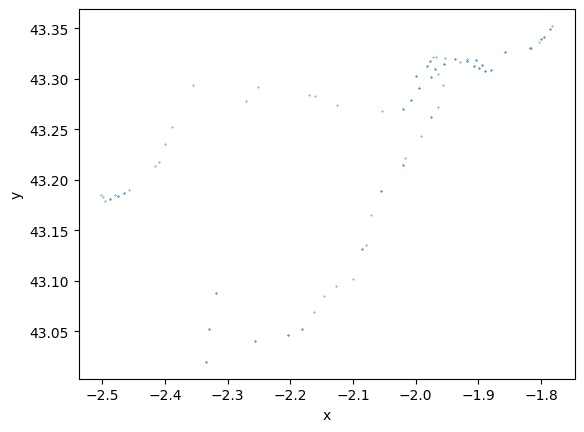

In [10]:
#urbanaccess_net.transit_edges.head(25)
#urbanaccess_net.transit_nodes.head(25)
urbanaccess_net.transit_nodes.plot(kind='scatter', x='x', y='y', s=0.1)

# Create a pedestrian network


In [11]:
nodes, edges = ua.osm.load.ua_network_from_bbox(bbox=bbox,
                                                remove_lcn=True)

INFO:osmnet:Requesting network data within bounding box from Overpass API in 4 request(s)
INFO:osmnet:Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](42.97939051,-2.54228822,43.18868130,-2.13466437);>;);out;'}"


Requesting network data within bounding box from Overpass API in 4 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](42.97939051,-2.54228822,43.18868130,-2.13466437);>;);out;'}"


INFO:osmnet:Downloaded 42,786.1KB from www.overpass-api.de in 3.14 seconds


Downloaded 42,786.1KB from www.overpass-api.de in 3.14 seconds


INFO:osmnet:Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](43.18632431,-2.54228822,43.39254746,-2.13173569);>;);out;'}"


Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](43.18632431,-2.54228822,43.39254746,-2.13173569);>;);out;'}"


INFO:osmnet:Downloaded 21,365.7KB from www.overpass-api.de in 2.46 seconds


Downloaded 21,365.7KB from www.overpass-api.de in 2.46 seconds


INFO:osmnet:Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](43.18254539,-2.13466437,43.39254746,-1.72979091);>;);out;'}"


Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](43.18254539,-2.13466437,43.39254746,-1.72979091);>;);out;'}"


INFO:osmnet:Downloaded 43,867.7KB from www.overpass-api.de in 3.12 seconds


Downloaded 43,867.7KB from www.overpass-api.de in 3.12 seconds


INFO:osmnet:Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](42.97939051,-2.13756201,43.18632431,-1.72979091);>;);out;'}"


Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](42.97939051,-2.13756201,43.18632431,-1.72979091);>;);out;'}"


INFO:osmnet:Downloaded 31,896.7KB from www.overpass-api.de in 2.81 seconds


Downloaded 31,896.7KB from www.overpass-api.de in 2.81 seconds


INFO:osmnet:Downloaded OSM network data within bounding box from Overpass API in 4 request(s) and 17.05 seconds


Downloaded OSM network data within bounding box from Overpass API in 4 request(s) and 17.05 seconds


INFO:osmnet:35,766 duplicate records removed. Took 11.35 seconds


35,766 duplicate records removed. Took 11.35 seconds


INFO:osmnet:Returning OSM data with 1,195,504 nodes and 84,484 ways...


Returning OSM data with 1,195,504 nodes and 84,484 ways...


INFO:osmnet:Edge node pairs completed. Took 102.39 seconds


Edge node pairs completed. Took 102.39 seconds


INFO:osmnet:Returning processed graph with 95,132 nodes and 258,008 edges...
INFO:osmnet:Completed OSM data download and Pandana node and edge table creation in 136.19 seconds
INFO:urbanaccess:checking for low connectivity nodes...


Returning processed graph with 95,132 nodes and 258,008 edges...
Completed OSM data download and Pandana node and edge table creation in 136.19 seconds
checking for low connectivity nodes...


INFO:urbanaccess:232 out of 95,132 nodes (0.24 percent of total) were identified as having low connectivity and have been removed.
INFO:urbanaccess:Completed OSM data download and graph node and edge table creation in 253.76 seconds


232 out of 95,132 nodes (0.24 percent of total) were identified as having low connectivity and have been removed.
Completed OSM data download and graph node and edge table creation in 253.76 seconds


In [12]:
# Create the network itself

ua.osm.network.create_osm_net(osm_edges=edges,
                              osm_nodes=nodes,
                              travel_speed_mph=3)
#urbanaccess_net.osm_nodes.head()
#urbanaccess_net.osm_edges.head()
#urbanaccess_net.osm_nodes.plot(kind='scatter', x='x', y='y', s=0.1)

INFO:urbanaccess:Created OSM network with travel time impedance using a travel speed of 3 MPH. Took 0.01 seconds


Created OSM network with travel time impedance using a travel speed of 3 MPH. Took 0.01 seconds


# Create an integrated transit and pedestrian network

In [13]:
ua.network.integrate_network(urbanaccess_network=urbanaccess_net,
                             headways=False)

#urbanaccess_net.net_nodes.head()
#urbanaccess_net.net_edges.head()
#urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type'] == 'transit'].head()

INFO:urbanaccess:Loaded UrbanAccess network components comprised of:
INFO:urbanaccess:     Transit: 105 nodes and 11,331 edges;
INFO:urbanaccess:     OSM: 94,900 nodes and 257,548 edges
INFO:urbanaccess:Connector edges between the OSM and transit network nodes successfully completed. Took 0.11 seconds


Loaded UrbanAccess network components comprised of:
     Transit: 105 nodes and 11,331 edges;
     OSM: 94,900 nodes and 257,548 edges
Connector edges between the OSM and transit network nodes successfully completed. Took 0.11 seconds


INFO:urbanaccess:Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 2.66 seconds
INFO:urbanaccess:Network edge and node network integration completed successfully resulting in a total of 95,005 nodes and 269,089 edges:
INFO:urbanaccess:     Transit: 105 nodes 11,331 edges;
INFO:urbanaccess:     OSM: 94,900 nodes 257,548 edges; and
INFO:urbanaccess:     OSM/Transit connector: 210 edges.


Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 2.66 seconds
Network edge and node network integration completed successfully resulting in a total of 95,005 nodes and 269,089 edges:
     Transit: 105 nodes 11,331 edges;
     OSM: 94,900 nodes 257,548 edges; and
     OSM/Transit connector: 210 edges.


In [14]:
urbanaccess_net.net_edges

,from,to,weight,unique_agency_id,unique_trip_id,sequence,edge_id,route_type,unique_route_id,net_type,...,oneway,toll,lanes,maxspeed,hgv,area,width,junction,from_int,to_int
0,11511_renfe_operadora,11400_renfe_operadora,52.000000,renfe_operadora,0028112023-09-06_renfe_operadora,1.0,0028112023-09-06_renfe_operadora_1,2.0,1151111208GL026_renfe_operadora,transit,...,nan,nan,nan,nan,nan,nan,nan,nan,31,32
1,11511_renfe_operadora,11400_renfe_operadora,52.000000,renfe_operadora,0028112023-09-11_renfe_operadora,1.0,0028112023-09-11_renfe_operadora_1,2.0,1151111208GL026_renfe_operadora,transit,...,nan,nan,nan,nan,nan,nan,nan,nan,31,32
2,11511_renfe_operadora,11400_renfe_operadora,60.000000,renfe_operadora,0028112023-09-30_renfe_operadora,1.0,0028112023-09-30_renfe_operadora_1,2.0,1151111208GL026_renfe_operadora,transit,...,nan,nan,nan,nan,nan,nan,nan,nan,31,32
3,11511_renfe_operadora,11400_renfe_operadora,52.000000,renfe_operadora,0028112023-10-02_renfe_operadora,1.0,0028112023-10-02_renfe_operadora_1,2.0,1151111208GL026_renfe_operadora,transit,...,nan,nan,nan,nan,nan,nan,nan,nan,31,32
4,11400_renfe_operadora,11511_renfe_operadora,55.000000,renfe_operadora,0028212023-09-06_renfe_operadora,1.0,0028212023-09-06_renfe_operadora_1,2.0,1120811511GL026_renfe_operadora,transit,...,nan,nan,nan,nan,nan,nan,nan,nan,32,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269084,292978769,ES:Euskotren:Quay:26661:_euskotren_trena,0.143981,nan,nan,NaN,nan,NaN,nan,osm to transit,...,nan,nan,nan,nan,nan,nan,nan,nan,3630,103
269085,ES:Euskotren:Quay:26671:_euskotren_trena,3736548181,0.101066,nan,nan,NaN,nan,NaN,nan,transit to osm,...,nan,nan,nan,nan,nan,nan,nan,nan,104,54997
269086,3736548181,ES:Euskotren:Quay:26671:_euskotren_trena,0.101066,nan,nan,NaN,nan,NaN,nan,osm to transit,...,nan,nan,nan,nan,nan,nan,nan,nan,54997,104
269087,ES:Euskotren:Quay:26672:_euskotren_trena,3736548181,0.101066,nan,nan,NaN,nan,NaN,nan,transit to osm,...,nan,nan,nan,nan,nan,nan,nan,nan,105,54997


# Save network to disk and then load this network

In [ ]:
#ua.network.save_network(urbanaccess_network=urbanaccess_net,
                        filename='final_net.h5',
                        overwrite_key = True)

INFO:urbanaccess:New final_net.h5 hdf5 store created in dir: data


New final_net.h5 hdf5 store created in dir: data


INFO:urbanaccess:edges saved in data/final_net.h5 hdf5 store.
INFO:urbanaccess:Using existing data/final_net.h5 hdf5 store.


edges saved in data/final_net.h5 hdf5 store.
Using existing data/final_net.h5 hdf5 store.


INFO:urbanaccess:nodes saved in data/final_net.h5 hdf5 store.


nodes saved in data/final_net.h5 hdf5 store.


In [ ]:
#urbanaccess_net = ua.network.load_network(filename='final_net.h5')

INFO:urbanaccess:Successfully read store: data/final_net.h5 with the following keys: ['/edges', '/nodes']


Successfully read store: data/final_net.h5 with the following keys: ['/edges', '/nodes']


INFO:urbanaccess:Successfully read store: data/final_net.h5 with the following keys: ['/edges', '/nodes']


Successfully read store: data/final_net.h5 with the following keys: ['/edges', '/nodes']


# Visualizing the network

In [ ]:
# Plot transit network, change 'transit' for 'walk' to see pedestrian network

# Use the col_colors function to color edges by travel time. In this case the darker red the higher the travel times. Otherwise write '#999999' which is black.

edgecolor = ua.plot.col_colors(df=urbanaccess_net.net_edges, col='weight', cmap='gist_heat_r', num_bins=5)

ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type']=='transit'],
                 bbox=None,
                 fig_height=30, margin=0.02,
                 edge_color=edgecolor, edge_linewidth=1, edge_alpha=1,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

In [ ]:
# Search for all the existing agencies

urbanaccess_net.net_edges['unique_agency_id'].unique()

In [ ]:
len(urbanaccess_net.net_edges['unique_agency_id'].unique())

In [ ]:
# Plot an specific agency's routes

ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges[urbanaccess_net.net_edges['unique_agency_id']=='lurraldebus_transportes_pesa_s.a.'],
                 bbox=bbox,
                 fig_height=30, margin=0.02,
                 edge_color='#999999', edge_linewidth=1, edge_alpha=1,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

In [ ]:
# Search for all the existing routes

urbanaccess_net.net_edges['unique_route_id'].unique()

In [ ]:
resultados_filtrados = [elemento for elemento in urbanaccess_net.net_edges['unique_route_id'].unique() if "bilman" in elemento]

# Mostrar los resultados filtrados
for resultado in resultados_filtrados:
    print(resultado)

In [ ]:
len(urbanaccess_net.net_edges['unique_route_id'].unique())

In [ ]:
# Plot an specific route

ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges[urbanaccess_net.net_edges['unique_route_id']=='9_lurraldebus_euskotren'],
                 bbox=bbox,
                 fig_height=30, margin=0.02,
                 edge_color='#999999', edge_linewidth=1, edge_alpha=1,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

# Add average headways to network travel time

The network we have generated so far only contains pure travel times. UrbanAccess allows for the calculation of and addition of route stop level average headways to the network. This is used as a proxy for passenger wait times at stops and stations. The route stop level average headway are added to the pedestrian to transit connector edges.

Let's calculate headways for the same AM Peak time period. Statistics on route stop level headways will be added to your GTFS transit data object inside of headways

In [15]:
ua.gtfs.headways.headways(gtfsfeeds_df=loaded_feeds,
                          headway_timerange=['07:00:00','10:00:00'])
loaded_feeds.headways

INFO:urbanaccess:Stop times from 07:00:00 to 10:00:00 successfully selected 2,880 records out of 15,928 total records (18.08 percent of total). Took 0.00 seconds
INFO:urbanaccess:Starting route stop headway calculation for 148 route stops...


Stop times from 07:00:00 to 10:00:00 successfully selected 2,880 records out of 15,928 total records (18.08 percent of total). Took 0.00 seconds
Starting route stop headway calculation for 148 route stops...


INFO:urbanaccess:Route stop headway calculation complete. Took 0.45 seconds
INFO:urbanaccess:headway calculation complete. Took 0.83 seconds


Route stop headway calculation complete. Took 0.45 seconds
headway calculation complete. Took 0.83 seconds


,count,mean,std,min,25%,50%,75%,max,unique_stop_id,unique_route_id,node_id_route
105,19.0,6.842105,19.224588,0.0,0.0,0.0,0.0,79.0,11305_renfe_cercanias,61T0001C1_renfe_cercanias,11305_renfe_cercanias_61T0001C1_renfe_cercanias
228,19.0,6.842105,19.224588,0.0,0.0,0.0,0.0,79.0,11305_renfe_cercanias,61T0001C1_renfe_cercanias,11305_renfe_cercanias_61T0001C1_renfe_cercanias
305,19.0,6.842105,19.224588,0.0,0.0,0.0,0.0,79.0,11305_renfe_cercanias,61T0001C1_renfe_cercanias,11305_renfe_cercanias_61T0001C1_renfe_cercanias
419,19.0,6.842105,19.224588,0.0,0.0,0.0,0.0,79.0,11305_renfe_cercanias,61T0001C1_renfe_cercanias,11305_renfe_cercanias_61T0001C1_renfe_cercanias
471,19.0,6.842105,19.224588,0.0,0.0,0.0,0.0,79.0,11305_renfe_cercanias,61T0001C1_renfe_cercanias,11305_renfe_cercanias_61T0001C1_renfe_cercanias
...,...,...,...,...,...,...,...,...,...,...,...
2380,11.0,15.000000,0.000000,15.0,15.0,15.0,15.0,15.0,ES:Euskotren:Quay:26672:_euskotren_trena,ES:Euskotren:Line:12:_euskotren_trena,ES:Euskotren:Quay:26672:_euskotren_trena_ES:Eu...
2420,11.0,15.000000,0.000000,15.0,15.0,15.0,15.0,15.0,ES:Euskotren:Quay:26672:_euskotren_trena,ES:Euskotren:Line:12:_euskotren_trena,ES:Euskotren:Quay:26672:_euskotren_trena_ES:Eu...
2454,11.0,15.000000,0.000000,15.0,15.0,15.0,15.0,15.0,ES:Euskotren:Quay:26672:_euskotren_trena,ES:Euskotren:Line:12:_euskotren_trena,ES:Euskotren:Quay:26672:_euskotren_trena_ES:Eu...
2494,11.0,15.000000,0.000000,15.0,15.0,15.0,15.0,15.0,ES:Euskotren:Quay:26672:_euskotren_trena,ES:Euskotren:Line:12:_euskotren_trena,ES:Euskotren:Quay:26672:_euskotren_trena_ES:Eu...


In [ ]:
len(loaded_feeds.headways['unique_route_id'].unique())
# Hay 152 rutas en Gipuzkoa
#len(loaded_feeds.headways['unique_stop_id'].unique())
# Hay 2582 paradas en Gipuzkoa
#len(loaded_feeds.headways['node_id_route'].unique())
# Hay 4656 paradas en Gipuzkoa teniendo en cuenta que si dos rutas pasan por la misma parada, cuenta como dos. Esto no me cuadra mucho. Aunque depende la hora que le meta.

In [16]:
ua.network.integrate_network(urbanaccess_network=urbanaccess_net,
                             headways=True,
                             urbanaccess_gtfsfeeds_df=loaded_feeds,
                             headway_statistic='mean')

INFO:urbanaccess:Loaded UrbanAccess network components comprised of:
INFO:urbanaccess:     Transit: 105 nodes and 11,331 edges;
INFO:urbanaccess:     OSM: 94,900 nodes and 257,548 edges
INFO:urbanaccess:routes successfully joined to transit nodes. Took 0.02 seconds


Loaded UrbanAccess network components comprised of:
     Transit: 105 nodes and 11,331 edges;
     OSM: 94,900 nodes and 257,548 edges
routes successfully joined to transit nodes. Took 0.02 seconds


INFO:urbanaccess:Connector edges between the OSM and transit network nodes successfully completed. Took 0.15 seconds
INFO:urbanaccess:mean route stop headway will be used for pedestrian to transit edge impedance.
INFO:urbanaccess:Headway impedance calculation completed. Took 0.02 seconds


Connector edges between the OSM and transit network nodes successfully completed. Took 0.15 seconds
mean route stop headway will be used for pedestrian to transit edge impedance.
Headway impedance calculation completed. Took 0.02 seconds


INFO:urbanaccess:Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 3.91 seconds
INFO:urbanaccess:Network edge and node network integration completed successfully resulting in a total of 95,103 nodes and 272,017 edges:
INFO:urbanaccess:     Transit: 203 nodes 11,331 edges;
INFO:urbanaccess:     OSM: 94,900 nodes 257,548 edges; and
INFO:urbanaccess:     OSM/Transit connector: 3,138 edges.


Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 3.91 seconds
Network edge and node network integration completed successfully resulting in a total of 95,103 nodes and 272,017 edges:
     Transit: 203 nodes 11,331 edges;
     OSM: 94,900 nodes 257,548 edges; and
     OSM/Transit connector: 3,138 edges.


In [ ]:
edgecolor = ua.plot.col_colors(df=urbanaccess_net.net_edges, col='weight', cmap='gist_heat_r', num_bins=5)
ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges,
                 bbox=bbox,
                 fig_height=30, margin=0.02,
                 edge_color=edgecolor, edge_linewidth=1, edge_alpha=0.7,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

# Pruebas integrated Network

In [ ]:
#len(urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type'] == 'transit to osm']['to'].unique())
len(urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type'] == 'transit to osm']['from'])

4656

In [ ]:
prueba=urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type'] == 'transit to osm']
counts = prueba['to'].value_counts()

# Mostrar los resultados por pantalla en orden descendente
print(counts)
#len(prueba)

1646385266    21
3721631687    21
365864833     20
293039506     20
431185810     19
              ..
394858636      1
306088911      1
553031326      1
611595758      1
343672006      1
Name: to, Length: 1751, dtype: int64


In [ ]:
filtered_df = prueba[prueba['to'] == '1646385266']
filtered_df

,weight,unique_agency_id,unique_trip_id,sequence,edge_id,route_type,unique_route_id,net_type,from,to,...,lanes,maxspeed,hgv,area,width,junction,mean,node_id_route,from_int,to_int
371436,0.105976,nan,nan,NaN,nan,NaN,nan,transit to osm,377_lurraldebus_euskotren_10_lurraldebus_eusko...,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,49,29242
372383,0.105976,nan,nan,NaN,nan,NaN,nan,transit to osm,377_lurraldebus_autobuses_la_guipuzcoana_s.l._...,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,128,29242
378388,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_5_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,630,29242
403827,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_24_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,966,29242
405395,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_25_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,1007,29242
412321,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_27_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,1130,29242
426973,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_35_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,1413,29242
435035,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_45_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,1683,29242
435962,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_47_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,1744,29242
438430,0.105976,nan,nan,NaN,nan,NaN,nan,transit to osm,377_lurraldebus_cia_tranvia_de_tolosa_1_lurral...,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,2035,29242


In [ ]:
unique_rows_count = prueba.drop_duplicates().shape[0]

# Mostrar el resultado por pantalla
print("Número de filas únicas:", unique_rows_count)

Número de filas únicas: 4656


In [ ]:
urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type'] == 'transit to osm']

,weight,unique_agency_id,unique_trip_id,sequence,edge_id,route_type,unique_route_id,net_type,from,to,...,lanes,maxspeed,hgv,area,width,junction,mean,node_id_route,from_int,to_int
371064,0.089141,nan,nan,NaN,nan,NaN,nan,transit to osm,75_zarauzko_hiribusa_01_zarauzko_hiribusa,7734570898,...,nan,nan,nan,nan,nan,nan,NaN,nan,1,92955
371085,0.024650,nan,nan,NaN,nan,NaN,nan,transit to osm,667_zarauzko_hiribusa_01_zarauzko_hiribusa,340014796,...,nan,nan,nan,nan,nan,nan,NaN,nan,2,12366
371096,0.081845,nan,nan,NaN,nan,NaN,nan,transit to osm,645_zarauzko_hiribusa_01_zarauzko_hiribusa,7741457791,...,nan,nan,nan,nan,nan,nan,NaN,nan,3,93671
371107,0.117232,nan,nan,NaN,nan,NaN,nan,transit to osm,652_zarauzko_hiribusa_01_zarauzko_hiribusa,731854953,...,nan,nan,nan,nan,nan,nan,NaN,nan,4,25085
371118,0.053746,nan,nan,NaN,nan,NaN,nan,transit to osm,658_zarauzko_hiribusa_01_zarauzko_hiribusa,340014813,...,nan,nan,nan,nan,nan,nan,NaN,nan,5,12369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462744,0.208897,nan,nan,NaN,nan,NaN,nan,transit to osm,1049_lurraldebus_euskotren_7_lurraldebus_eusko...,8854621846,...,nan,nan,nan,nan,nan,nan,NaN,nan,4652,97277
462747,0.389842,nan,nan,NaN,nan,NaN,nan,transit to osm,1118_lurraldebus_euskotren_7_lurraldebus_eusko...,339959138,...,nan,nan,nan,nan,nan,nan,NaN,nan,4653,12330
462752,0.481076,nan,nan,NaN,nan,NaN,nan,transit to osm,861_lurraldebus_transportes_pesa_s.a._7_lurral...,2109920318,...,nan,nan,nan,nan,nan,nan,NaN,nan,4654,35242
462755,0.159136,nan,nan,NaN,nan,NaN,nan,transit to osm,350_lurraldebus_autobuses_garayar_s.a._7_lurra...,9732804357,...,nan,nan,nan,nan,nan,nan,NaN,nan,4655,103772


INFO:urbanaccess:Figure created. Took 1.30 seconds


Figure created. Took 1.30 seconds


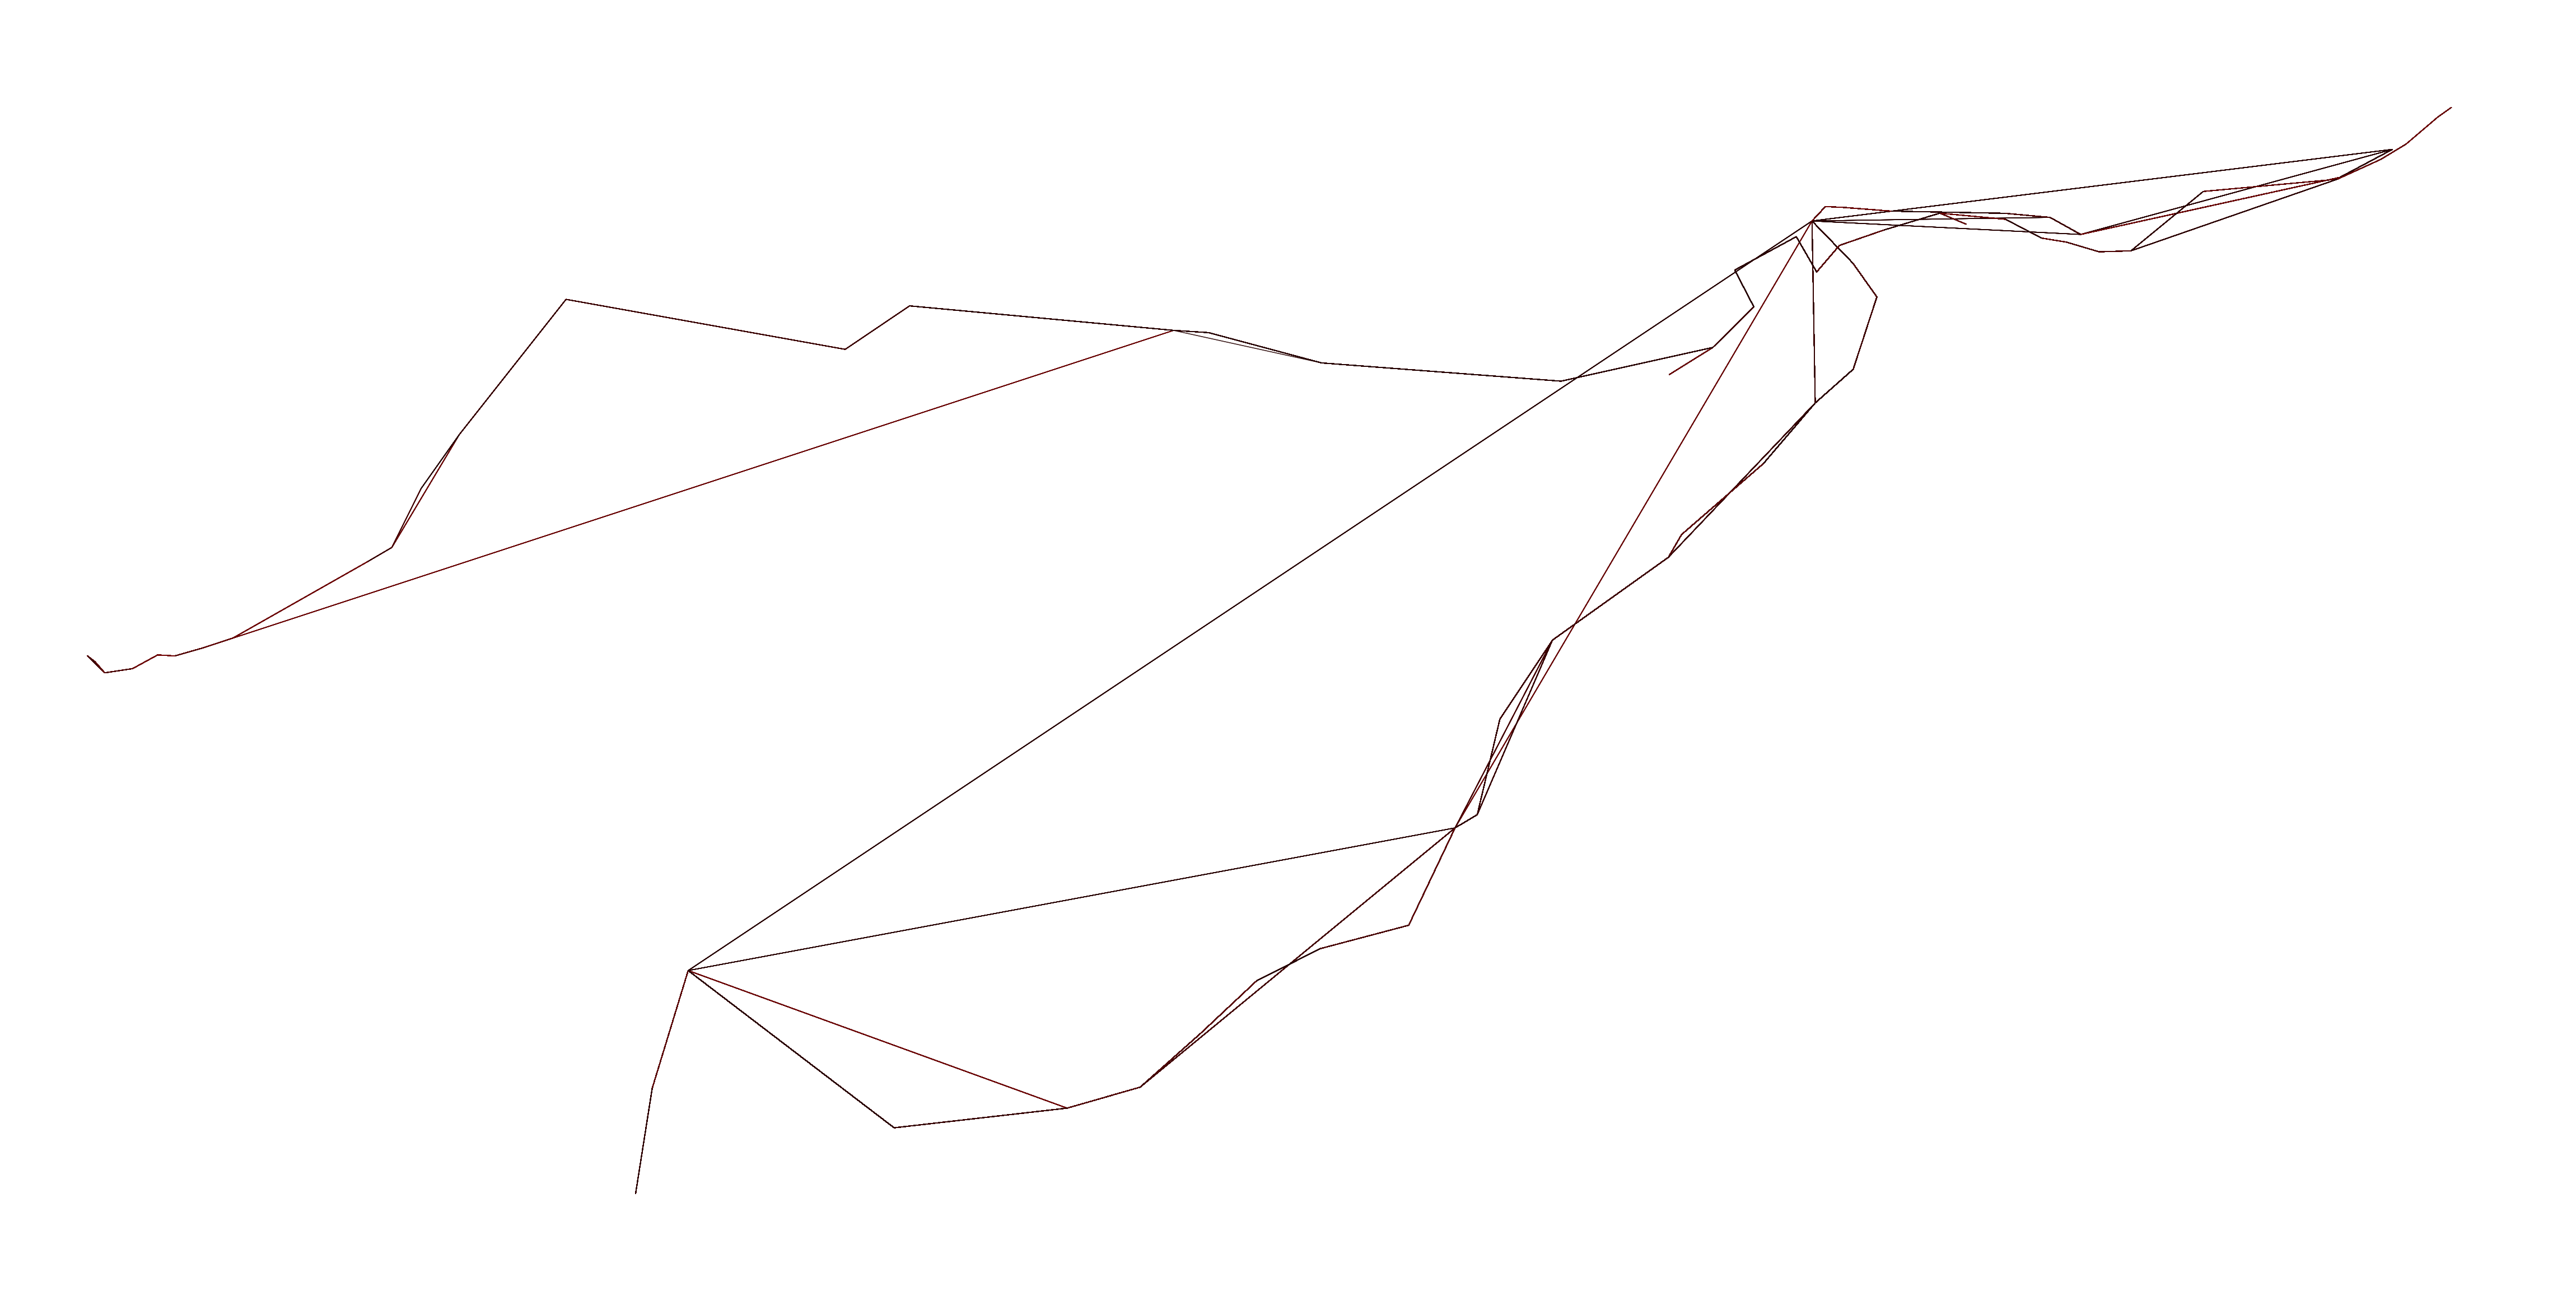

(<Figure size 5909.98x3000 with 1 Axes>, <Axes: >)

In [17]:
edgecolor = ua.plot.col_colors(df=urbanaccess_net.net_edges, col='weight', cmap='gist_heat_r', num_bins=5)
ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type']=='transit'],
                 bbox=bbox,
                 fig_height=30, margin=0.02,
                 edge_color=edgecolor, edge_linewidth=1, edge_alpha=0.7,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

# Using the UrbanAccess network with Pandana

In [ ]:
urbanaccess_net.net_nodes.dtypes

id           object
x           float64
y           float64
net_type     object
dtype: object

In [ ]:
urbanaccess_net.net_edges.dtypes

weight              float64
unique_agency_id     object
unique_trip_id       object
sequence            float64
edge_id              object
route_type          float64
unique_route_id      object
net_type             object
from                 object
to                   object
distance            float64
name                 object
ref                  object
highway              object
service              object
bridge               object
tunnel               object
access               object
oneway               object
toll                 object
lanes                object
maxspeed             object
hgv                  object
area                 object
width                object
junction             object
mean                float64
node_id_route        object
from_int              int64
to_int                int64
dtype: object

In [18]:
s_time = time.time()
transit_ped_net = pdna.network.Network(urbanaccess_net.net_nodes["x"],
                               urbanaccess_net.net_nodes["y"],
                               urbanaccess_net.net_edges["from_int"],
                               urbanaccess_net.net_edges["to_int"],
                               urbanaccess_net.net_edges[["weight"]],
                               twoway=False)
print('Took {:,.2f} seconds'.format(time.time() - s_time))

Took 12.62 seconds


In [19]:
transit_ped_net.save_hdf5('/content/drive/MyDrive/Mode-choice/CS_NTT_Gipuzkoa/notebooks/networks/train_net.h5')

In [21]:
urbanaccess_net.net_nodes.to_csv('/content/drive/MyDrive/Mode-choice/CS_NTT_Gipuzkoa/notebooks/data/train_nodes.csv')

In [28]:
urbanaccess_net.net_nodes

,id,x,y,net_type
id_int,,,,
1,11511_renfe_operadora_1151111208GL026_renfe_op...,-1.976704,43.317669,NaN
2,11400_renfe_operadora_1120811511GL026_renfe_op...,-2.318462,43.088273,NaN
3,11511_renfe_operadora_1151171801GL023_renfe_op...,-1.976704,43.317669,NaN
4,11511_renfe_operadora_1151178400GL023_renfe_op...,-1.976704,43.317669,NaN
5,11600_renfe_operadora_1160017000GL023_renfe_op...,-1.800192,43.339582,NaN
...,...,...,...,...
95099,11174413701,-2.000378,43.235373,walk
95100,11174413704,-2.000074,43.235179,walk
95101,11174413737,-2.000542,43.235506,walk
